In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

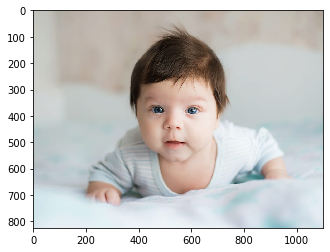

In [29]:
img = cv2.imread('im.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
original_img = img
plt.show()

In [7]:
print(img.shape)

(825, 1100, 3)


In [8]:
#Flatten each channel of the image in a linear array
all_pixels = img.reshape((825*1100),3)

In [9]:
print(all_pixels.shape)

(907500, 3)


In [10]:
from sklearn.cluster import KMeans

In [12]:
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
centers = km.cluster_centers_

In [16]:
centers = np.array(centers,dtype='uint8')
print(centers)

[[190 188 183]
 [ 65  49  38]
 [155 133 121]
 [214 220 223]]


# Lets plot what all color are these values ?

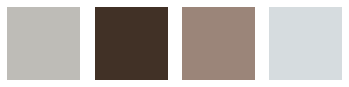

In [19]:
i = 1
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i += 1
    colors.append(each_col)
    #color swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

# Segmenting our original image

In [21]:
new_img = np.zeros((825*1100,3),dtype='uint8')
print(new_img.shape)

(907500, 3)


In [25]:
a = km.labels_
len(a)

907500

In [26]:
colors

[array([190, 188, 183], dtype=uint8),
 array([65, 49, 38], dtype=uint8),
 array([155, 133, 121], dtype=uint8),
 array([214, 220, 223], dtype=uint8)]

In [30]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

In [31]:
new_img = new_img.reshape((original_img.shape))

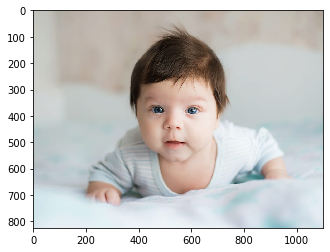

In [35]:
plt.imshow(original_img)
plt.show()

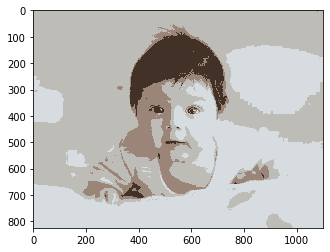

In [36]:
plt.imshow(new_img)
plt.show()